# Barack Obama Stock Portfolio

During Obama Presidental, he was more focus on healthcare. 


https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','XLV','JNJ','UNH', 'CSV']
start = '2009-01-01'
end = '2015-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 completed


,CSV,JNJ,SPY,UNH,XLV
Date,,,,,
2009-01-02,1.912488,40.963608,71.841026,22.826946,21.502743
2009-01-05,2.037604,40.558350,71.756004,22.454628,21.399555
2009-01-06,2.091226,40.315205,72.235161,21.925112,21.050303
2009-01-07,2.010794,39.936974,70.071266,21.759645,20.859804
2009-01-08,2.153784,39.862686,70.357208,22.098862,20.978859


In [3]:
df.tail()

,CSV,JNJ,SPY,UNH,XLV
Date,,,,,
2014-12-24,19.345476,86.025772,181.832016,91.814964,60.969177
2014-12-26,19.428934,86.412361,182.418350,91.698730,61.404408
2014-12-29,19.651518,86.634422,182.663422,91.502022,61.617577
2014-12-30,19.475306,86.659096,181.683243,91.966995,61.351124
2014-12-31,19.428934,86.009323,179.880371,90.393219,60.738228


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
6 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

6 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
CSV: 20000.0
JNJ: 20000.0
SPY: 20000.0
UNH: 20000.0
XLV: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
CSV: 10457
JNJ: 488
SPY: 278
UNH: 876
XLV: 930


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
CSV: $19998.89
JNJ: $19990.24
SPY: $19971.81
UNH: $19996.4
XLV: $19997.55


In [10]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
CSV: $203168.36
JNJ: $41972.55
SPY: $50006.74
UNH: $79184.46
XLV: $56486.55


In [11]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $430818.66


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: CSV: 915.9000000000001%
Holding Period Return: JNJ: 109.96999999999998%
Holding Period Return: SPY: 150.39000000000001%
Holding Period Return: UNH: 295.99%
Holding Period Return: XLV: 182.47%


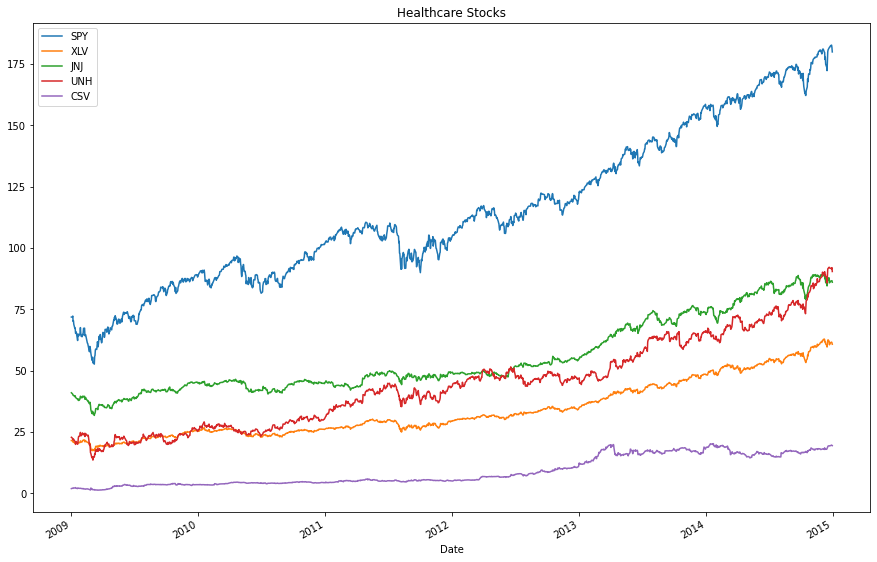

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Healthcare Stocks')
plt.legend()

In [14]:
df.min()

CSV     1.260098
JNJ    31.735104
SPY    52.636524
UNH    13.527385
XLV    17.367296
dtype: float64

In [15]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 182.66342163085938
XLV: 62.86825180053711
JNJ: 89.25823974609375
UNH: 92.13689422607422
CSV: 20.217079162597656


In [16]:
# Creating a Return Data Frame for all individual stock: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,XLV Return,JNJ Return,UNH Return,CSV Return
Date,,,,,
2009-01-05,-0.001183,-0.004799,-0.009893,-0.016310,0.065420
2009-01-06,0.006678,-0.016321,-0.005995,-0.023582,0.026316
2009-01-07,-0.029956,-0.009050,-0.009382,-0.007547,-0.038461
2009-01-08,0.004081,0.005707,-0.001860,0.015589,0.071111


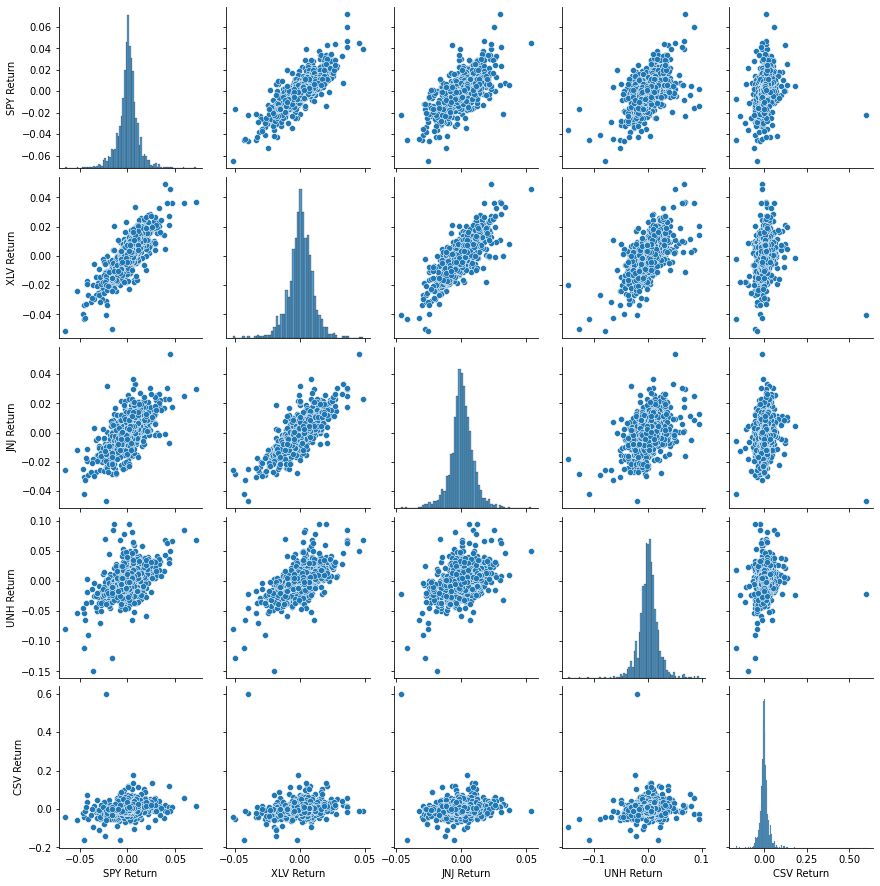

In [17]:
sns.pairplot(returns[1:] )

In [18]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return   2009-03-23
XLV Return   2009-03-12
JNJ Return   2011-08-11
UNH Return   2009-05-07
CSV Return   2009-02-27
dtype: datetime64[ns]


In [19]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return   2011-08-08
XLV Return   2011-08-08
JNJ Return   2009-02-27
UNH Return   2009-02-23
CSV Return   2009-03-03
dtype: datetime64[ns]


In [20]:
returns.corr()

,SPY Return,XLV Return,JNJ Return,UNH Return,CSV Return
SPY Return,1.000000,0.826475,0.661356,0.534741,0.233246
XLV Return,0.826475,1.000000,0.783054,0.635977,0.200409
JNJ Return,0.661356,0.783054,1.000000,0.440047,0.116575
UNH Return,0.534741,0.635977,0.440047,1.000000,0.170905
CSV Return,0.233246,0.200409,0.116575,0.170905,1.000000


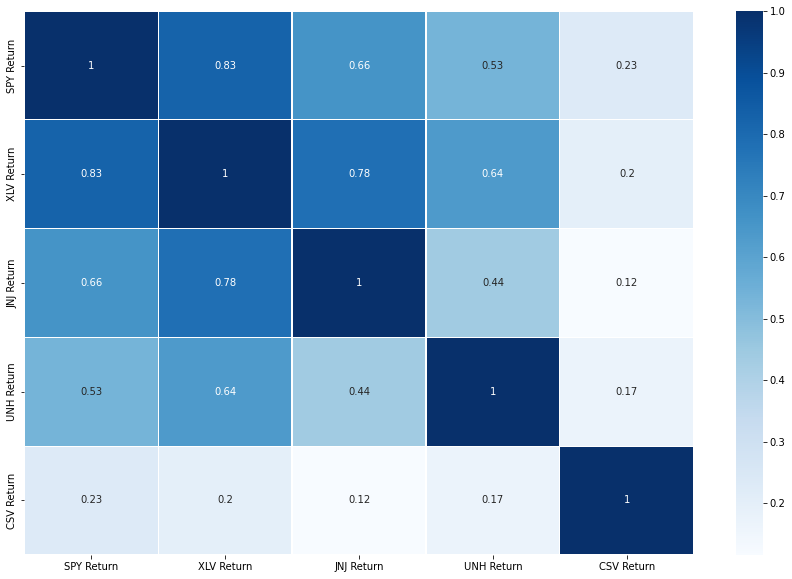

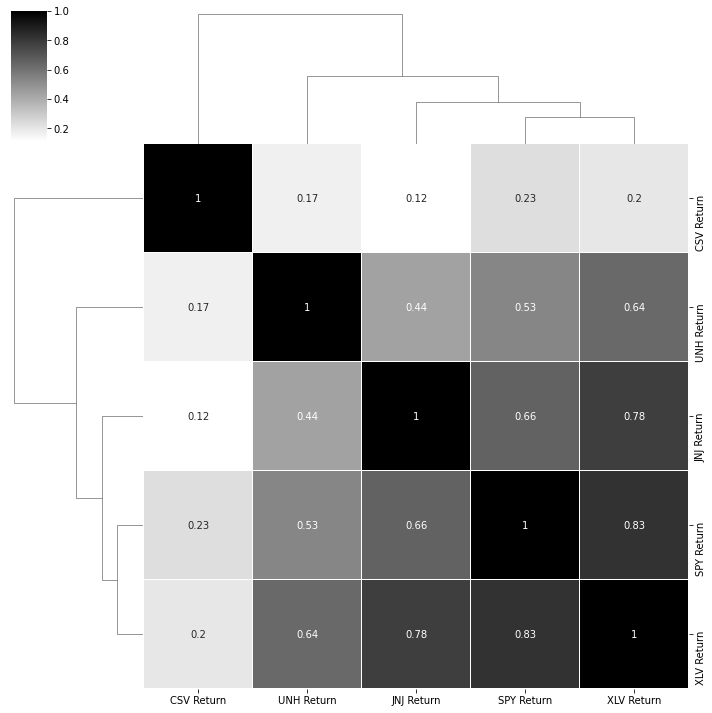

In [21]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

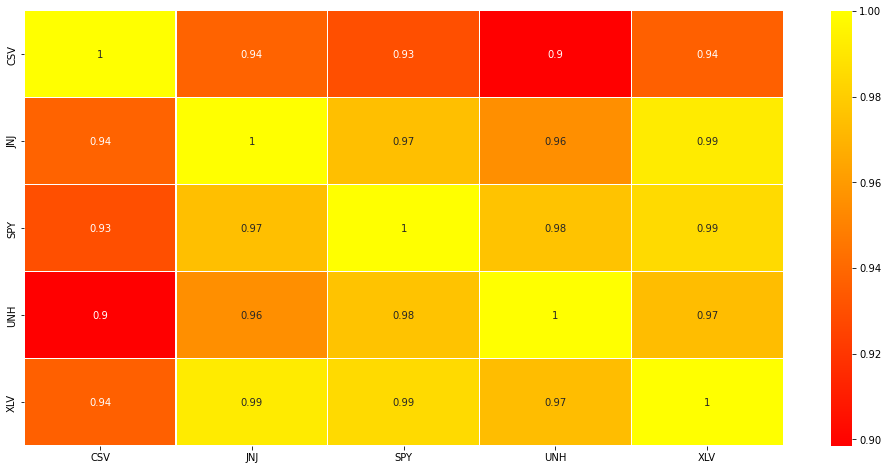

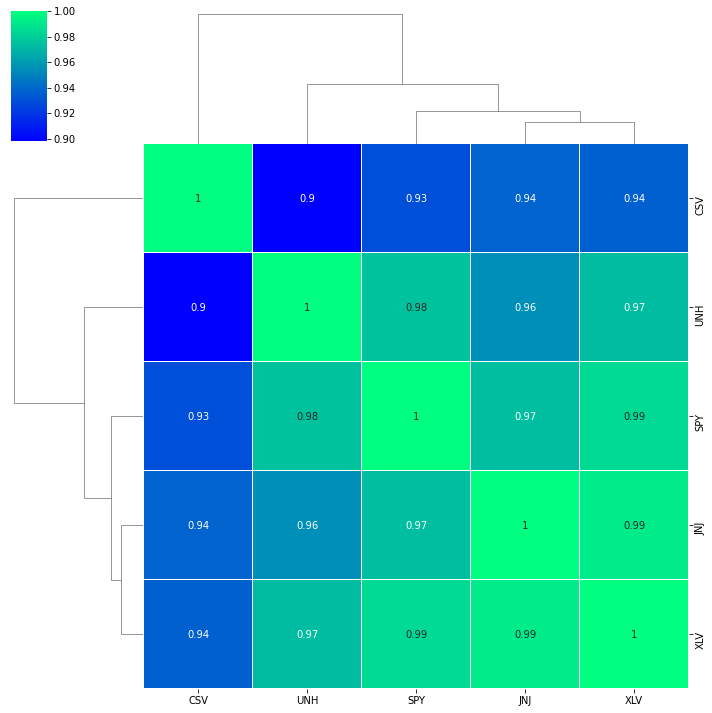

In [22]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [23]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [24]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [25]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------
90%                 [-0.03597575 -0.01105952 -0.01391636 -0.02305347 -0.01193605]
95%                 [-0.04672467 -0.01434572 -0.01805233 -0.02989805 -0.01552878]
99%                 [-0.06688786 -0.0205101  -0.02581071 -0.04273735 -0.02226815]


In [26]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
CSV: -0.036
JNJ: -0.0111
SPY: -0.0139
UNH: -0.0231
XLV: -0.0119


In [27]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
CSV: $3599.9999999999995
JNJ: $1110.0
SPY: $1390.0
UNH: $2310.0
XLV: $1190.0


In [28]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
CSV: $6690.0
JNJ: $2050.0
SPY: $2580.0
UNH: $4270.0
XLV: $2230.0
